<a href="https://colab.research.google.com/github/hieu1999210/stuffs/blob/master/HW3_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #  Homework 3: Problem 3 # 

# Part a) Collecting and Preprocessing data

In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf
tf.__version__



'2.0.0-alpha0'

In [0]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [0]:
#@title Set seeds { form-width: "30%", display-mode: "both" }
_Numpy_seed = 1 #@param {type:"integer"}
_Tensorflow_seed = 2 #@param {type:"integer"}
# set seed to reproduce the result

from numpy.random import seed
seed(_Numpy_seed)
tf.random.set_seed(_Tensorflow_seed)

In [0]:
import numpy as np


# load data

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

# convert data into tensors

# train_X = tf.convert_to_tensor(
#     train_X,
#     dtype=None,
#     name=None
# )

# test_X = tf.convert_to_tensor(
#     test_X,
#     dtype=None,
#     name=None,
# )


# extend image to 28x28x1

train_X = np.expand_dims(train_X,-1)
test_X = np.expand_dims(test_X,-1)

# train_X = tf.expand_dims(
#     train_X,
#     axis=3,
#     name=None
# )

# test_X = tf.expand_dims(
#     test_X,
#     axis=3,
#     name=None
# )

test_X.shape

(10000, 28, 28, 1)

In [0]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# def show_img(img):
#     plt.figure(dpi=100)
#     plt.imshow(img, cmap=plt.get_cmap('gray'))
#     plt.show()
    
# show_img(train_X[0])



In [0]:
# conver labels to one-hot vertors

from keras.utils import np_utils

train_onehot = np_utils.to_categorical(train_Y)
test_onehot = np_utils.to_categorical(test_Y)
print(test_onehot[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Part b) Building model

In [0]:
#@title Set seeds (to reproduce results) { form-width: "30%", display-mode: "both" }
_Dropout_seed = 3 #@param {type:"integer"}
_glorot_seed = 4 #@param {type:"integer"}
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers
# from keras.models import Sequential

def build_model(length, width):  # selected model

    model = Sequential()
    model.add(Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     kernel_initializer = initializers.glorot_uniform(seed=_glorot_seed),
                     activation='relu', input_shape=(length,width,1)))
    model.add(Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     kernel_initializer = initializers.glorot_uniform(seed=_glorot_seed),
                     activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128,
                    kernel_initializer=initializers.glorot_uniform(seed=_glorot_seed),
                    activation='relu'))
    model.add(Dropout(0.25, seed = _Dropout_seed))
    model.add(Dense(10,
                    kernel_initializer=initializers.glorot_uniform(seed=_glorot_seed),
                    activation='softmax'))
    return model

In [0]:
#@title Model components { form-width: "40%", display-mode: "both" }
_optimizer = "SGD" #@param {type:"string"}
_loss_function = "categorical_crossentropy" #@param {type:"string"}
_metric = "acc" #@param {type:"string"}
Length = 28 #@param {type:"integer"}
Width = 28 #@param {type:"integer"}
model = build_model(Length, Width)
model.summary()
model.compile(loss=_loss_function, optimizer=_optimizer, metrics=[_metric])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# Part c) Training model and Results

In [0]:
#@title Fitting setups { form-width: "30%", display-mode: "both" }
_number_of_epocks = 30 #@param {type:"integer"}
_batch_size = 128 #@param {type:"integer"}

#train model
history = model.fit(train_X,
          train_onehot,
          epochs=_number_of_epocks,
          batch_size=_batch_size,
          verbose=2)

Epoch 1/30
60000/60000 - 3s - loss: 0.8787 - acc: 0.8275
Epoch 2/30
60000/60000 - 3s - loss: 0.2456 - acc: 0.9252
Epoch 3/30
60000/60000 - 3s - loss: 0.1827 - acc: 0.9458
Epoch 4/30
60000/60000 - 3s - loss: 0.1508 - acc: 0.9546
Epoch 5/30
60000/60000 - 3s - loss: 0.1279 - acc: 0.9603
Epoch 6/30
60000/60000 - 3s - loss: 0.1119 - acc: 0.9661
Epoch 7/30
60000/60000 - 3s - loss: 0.1000 - acc: 0.9693
Epoch 8/30
60000/60000 - 3s - loss: 0.0923 - acc: 0.9713
Epoch 9/30
60000/60000 - 3s - loss: 0.0856 - acc: 0.9738
Epoch 10/30
60000/60000 - 3s - loss: 0.0775 - acc: 0.9757
Epoch 11/30
60000/60000 - 3s - loss: 0.0734 - acc: 0.9774
Epoch 12/30
60000/60000 - 3s - loss: 0.0687 - acc: 0.9791
Epoch 13/30
60000/60000 - 3s - loss: 0.0665 - acc: 0.9789
Epoch 14/30
60000/60000 - 3s - loss: 0.0597 - acc: 0.9819
Epoch 15/30
60000/60000 - 3s - loss: 0.0559 - acc: 0.9828
Epoch 16/30
60000/60000 - 3s - loss: 0.0533 - acc: 0.9829
Epoch 17/30
60000/60000 - 3s - loss: 0.0503 - acc: 0.9841
Epoch 18/30
60000/60000

In [0]:
test_loss, test_acc = model.evaluate(test_X, test_onehot)
print("loss: {}; acc: {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 101us/sample - loss: 0.0457 - acc: 0.9849
loss: 0.045701857172810195; acc: 0.9848999977111816


In [0]:
# from google.colab import drive
# drive.mount("/gdrive")

In [0]:
# cd "/gdrive/My Drive/Colab Notebooks"

In [0]:
# model.save_weights("HW3_adam.h5")

In [0]:
# model_json = model.to_json()
# with open("HW3_P3_adam_seed3.json", "w") as json_file:
#     json_file.write(model_json)

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    accuracy__score = accuracy_score(y_true, y_pred)
    print("Accuracy score: %.2f" % accuracy__score)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
y_pred = model.predict(test_X)
# print(y_pred[0])
decoded_y_pred = np.array([np.argmax(sample) for sample in y_pred])

Accuracy score: 0.98
Confusion matrix, without normalization


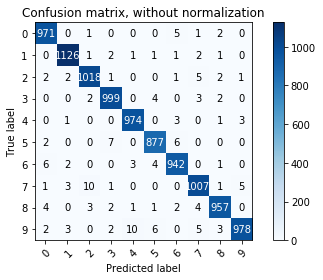

In [0]:
plot_confusion_matrix(test_Y, decoded_y_pred, classes=np.array(range(10)),
                      title='Confusion matrix, without normalization')